
# Projection depth 

Sample usage of projection depth computation.
It will plot samples and dataset based on projection depth values.


In [1]:
from depth.model.DepthEucl import DepthEucl 
import numpy as np
from matplotlib import pyplot as plt

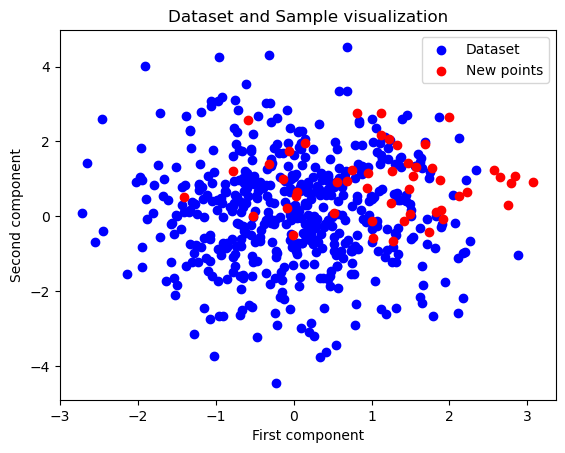

In [2]:
## Creating dataset and samples
np.random.seed(2801)
mat1=[[1, 0],[0, 2]]
mat2=[[1, 0],[0, 1]]
X = np.random.multivariate_normal([1,1], mat2, 50)
dataset = np.random.multivariate_normal([0,0], mat1, 500)

## visualize points
fig=plt.figure()
plt.scatter(dataset[:,0],dataset[:,1], c="blue",label="Dataset")
plt.scatter(X[:,0],X[:,1], c="red",label="New points")
plt.xlabel("First component")
plt.ylabel("Second component")
plt.title("Dataset and Sample visualization")
plt.legend()
plt.show()

Create model and load dataset for depth computation 



x value is set to the loaded dataset


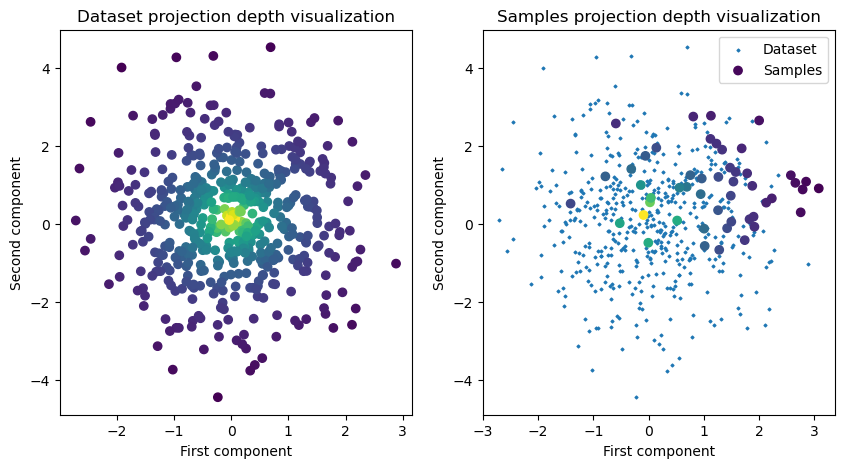

In [3]:
model=DepthEucl().load_dataset(dataset)
depthX=model.projection(X,output_option="lowest_depth") # Compute X Depth w.r.t. the dataset  
depthDataset=model.projection(evaluate_dataset=True,output_option="lowest_depth") # evaluate the dataset itself

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
ax2.scatter(dataset[:,0],dataset[:,1],s=2, label="Dataset",marker="D")
for x, depth, name, ax in zip([dataset,X],[depthDataset,depthX],
                              ["Dataset", "Samples"],[ax1,ax2]):
    ax.scatter(x[:,0],x[:,1], c=depth,label=name)
    ax.set_xlabel("First component")
    ax.set_ylabel("Second component")
    ax.set_title(f"{name} projection depth visualization")
ax2.legend()
plt.show()